## Importing everything


In [31]:
from skimage import transform
from skimage import feature
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# from tensorflow.keras.datasets import mnist

In [32]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [45]:
y_train.shape

(56000,)

In [46]:
print('Number of training samples', len(X_train))

Number of training samples 56000


In [47]:
X_train.shape

(56000, 784)

In [48]:
X_train = X_train/255
X_test = X_test/255

In [49]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20, learning_rate=1)
adaboost.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=20)

In [50]:
y_pred = adaboost.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1103,    0,   56,    7,    1,  106,   33,   10,   22,    5],
       [   0, 1440,   60,   28,    4,    6,    1,   49,   11,    1],
       [  31,  101,  927,   30,   28,   22,   87,   50,   91,   13],
       [  40,   48,   58,  943,   18,  108,   15,   76,   89,   38],
       [   1,    2,   41,   34,  720,   27,   32,  100,   42,  296],
       [  42,   25,   25,  261,   38,  686,   48,   30,   79,   39],
       [  42,   32,  185,   23,  115,   38,  903,    5,   51,    2],
       [  13,   21,   35,   22,   43,   29,    0, 1198,   20,  122],
       [  21,   90,   76,  169,   47,   45,   26,   24,  831,   28],
       [   3,   18,   66,   82,  318,   12,    3,  248,   62,  608]])

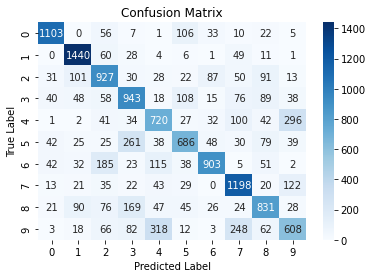

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()